# Data exploration

### Check input data

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image_dir = "data/training/images"  
mask_dir = "data/training/groundtruth"
TEST_DIR = "data/test_set_images"

In [3]:
def load_image_and_mask(image_name, mask_dir):
    image_path = os.path.join(image_dir, image_name)
    mask_path = os.path.join(mask_dir, image_name)
    image = np.array(Image.open(image_path))
    mask = np.array(Image.open(mask_path))
    return image, mask

In [4]:
def check_mask_format(mask):
    unique_values = np.unique(mask)
    is_binary = set(unique_values).issubset({0, 255}) 
    return is_binary, unique_values

In [5]:
def verify_alignment(image, mask):
    return image.shape[:2] == mask.shape

### Size of data

In [6]:
# Shape of the images
test_path = TEST_DIR + "/test_1/test_1.png"
test_image = np.array(Image.open(test_path))
size_test = test_image.shape[:2]
train_path = "data/training/images/satImage_001.png"
train_image = np.array(Image.open(train_path))
size_train = train_image.shape[:2]
print(f"The size of images of the train set is {size_train} and the size of images in the test set is {size_test}.")

The size of images of the train set is (400, 400) and the size of images in the test set is (608, 608).


In [37]:
def validate_dataset(image_dir, mask_dir, num_samples=5):
    image_files = os.listdir(image_dir)
    mask_files = os.listdir(mask_dir)

    assert len(image_files) == len(mask_files), "Mismatch in number of images and masks"
    
    sampled_files = np.random.choice(image_files, num_samples, replace=False)
    
    for image_name in sampled_files:
        print(f"Validating {image_name}...")
        image, mask = load_image_and_mask(image_name, mask_dir)
        
        # Check binary format of the mask
        is_binary, unique_values = check_mask_format(mask)
        if not is_binary:
            print(f"⚠️ Mask {image_name} is not binary! Unique values: {unique_values}")
        else:
            print(f"✔️ Mask {image_name} is binary. Unique values: {unique_values}")
        
        # Verify alignment
        aligned = verify_alignment(image, mask)
        if not aligned:
            print(f"❌ Image and mask {image_name} are not aligned!")
        else:
            print(f"✔️ Image and mask {image_name} are aligned.")

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Satellite image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Binary mask")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

Validating satImage_035.png...
⚠️ Mask satImage_035.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  65  66  67  68  69  70  71  72
  73  74  75  76  77  79  80  81  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 2

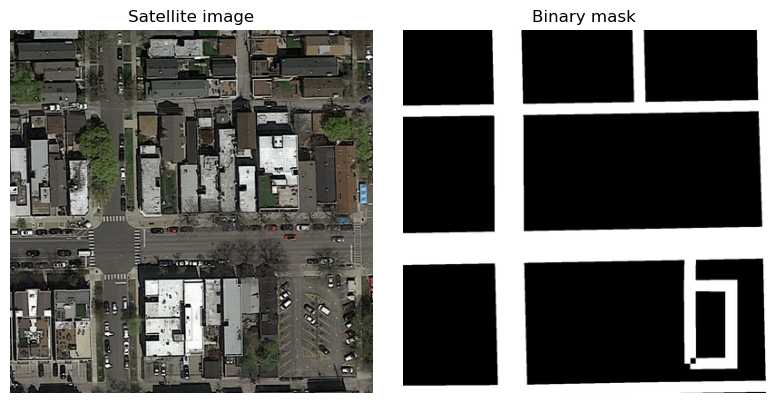

Validating satImage_032.png...
⚠️ Mask satImage_032.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

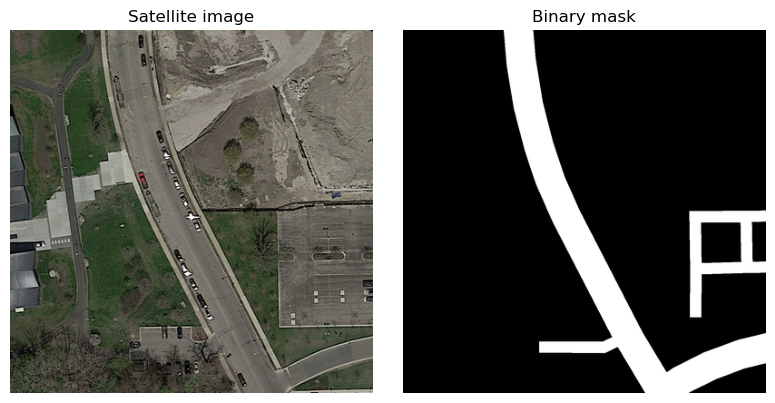

Validating satImage_075.png...
⚠️ Mask satImage_075.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

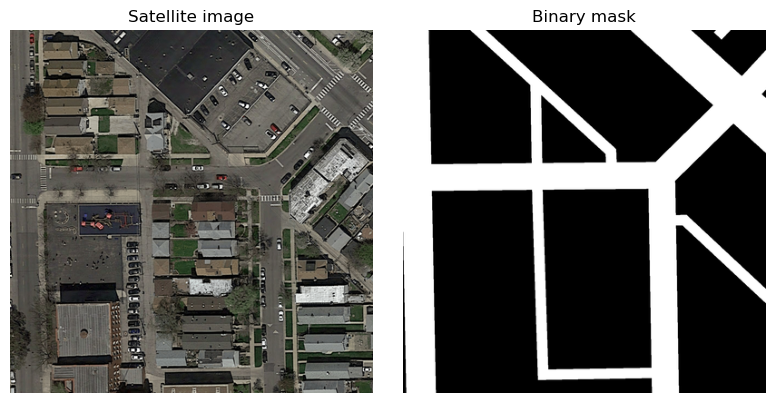

Validating satImage_072.png...
⚠️ Mask satImage_072.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

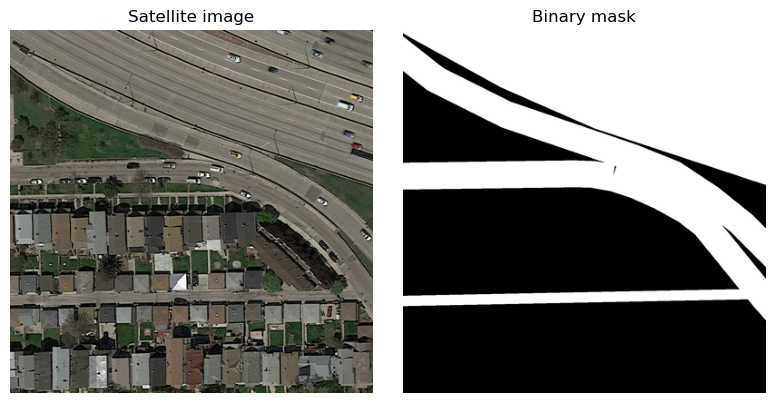

Validating satImage_025.png...
⚠️ Mask satImage_025.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98 100 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 2

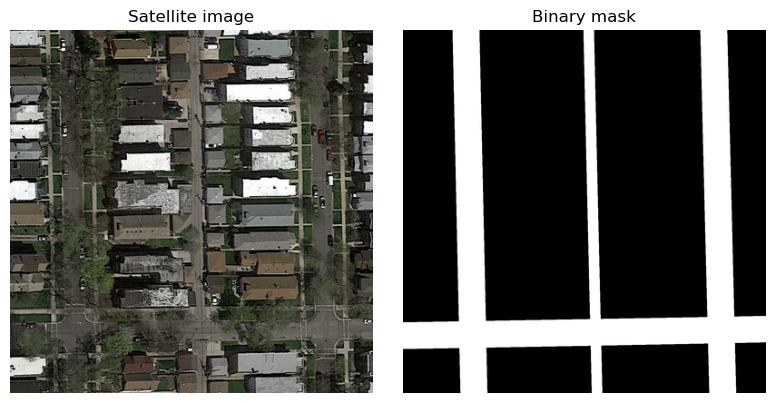

In [8]:
validate_dataset(image_dir, mask_dir, num_samples=5)

The mask contains pixels that are grey; the following function is converting any grey pixels into black or white pixels using a threshold of 128.

In [9]:
def binarize_mask(mask, threshold=128):
    """
    Converts a non-binary mask into a binary mask using a threshold.
    
    Parameters:
        mask (numpy array): Input mask.
        threshold (int): Threshold for binarization (default: 128).
        
    Returns:
        binary_mask (numpy array): Binarized mask with values 0 and 1.
    """
    if mask.max() > 1:
        mask = mask / 255.0 
    
    binary_mask = (mask > threshold / 255.0).astype(np.uint8)
    return binary_mask


def process_masks(mask_dir, output_dir, threshold=128):
    """
    Processes all masks in a directory to ensure they are binary.
    
    Parameters:
        mask_dir (str): Path to directory containing masks.
        output_dir (str): Path to directory to save processed masks.
        threshold (int): Threshold for binarization.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    mask_files = os.listdir(mask_dir)
    
    for mask_file in mask_files:
        mask_path = os.path.join(mask_dir, mask_file)
        mask = np.array(Image.open(mask_path).convert('L')) 
        
        binary_mask = binarize_mask(mask, threshold)
        
        binary_mask_image = Image.fromarray((binary_mask * 255).astype(np.uint8))
        binary_mask_image.save(os.path.join(output_dir, mask_file))

In [10]:
process_masks_dir = "data/training/groundtruth_binarize"
process_masks(mask_dir, process_masks_dir, threshold=128)

Validating satImage_052.png...
✔️ Mask satImage_052.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_052.png are aligned.


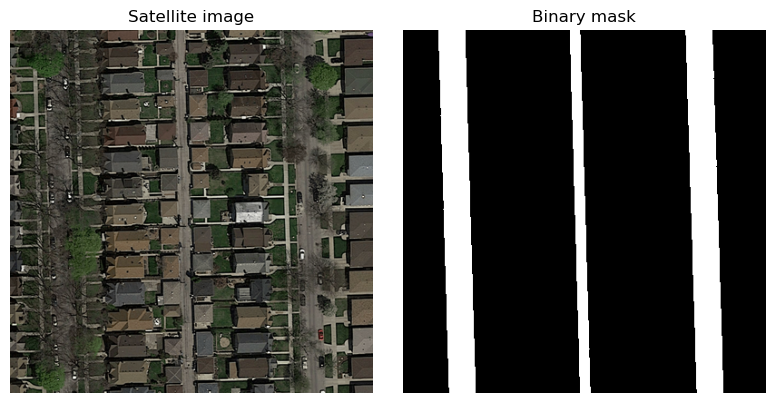

Validating satImage_005.png...
✔️ Mask satImage_005.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_005.png are aligned.


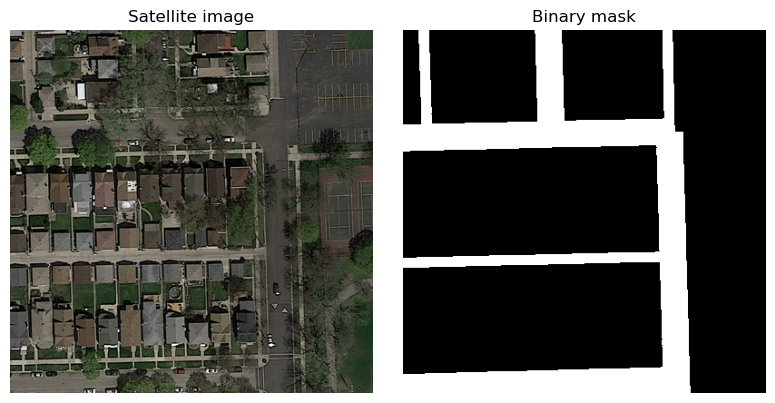

Validating satImage_077.png...
✔️ Mask satImage_077.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_077.png are aligned.


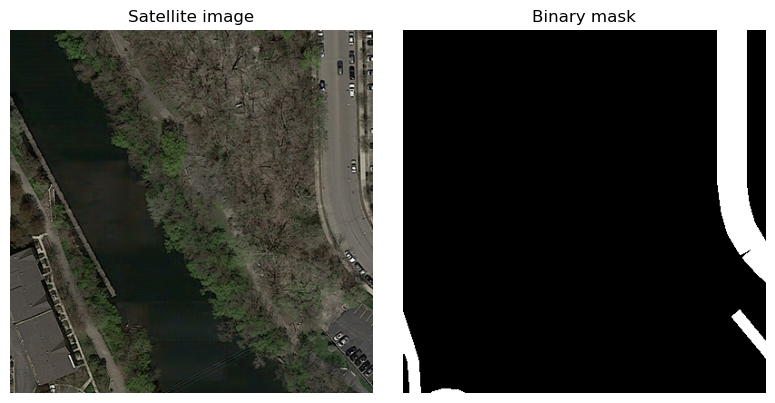

Validating satImage_072.png...
✔️ Mask satImage_072.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_072.png are aligned.


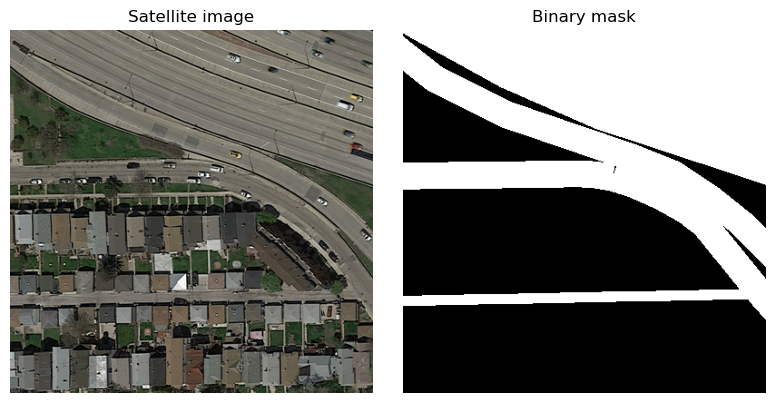

Validating satImage_022.png...
✔️ Mask satImage_022.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_022.png are aligned.


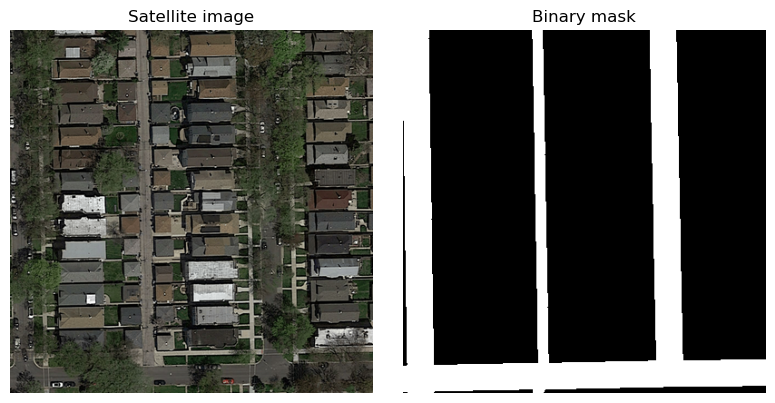

In [11]:
validate_dataset(image_dir, process_masks_dir, num_samples=5)

In [12]:
def plot_pixel_value_distribution(image_dir, num_samples=5):
    image_files = os.listdir(image_dir)
    sampled_files = np.random.choice(image_files, num_samples, replace=False)

    print("Analysis of image pixel values:")
    
    plt.figure(figsize=(12, 6))
    for image_name in sampled_files:
        image = np.array(Image.open(os.path.join(image_dir, image_name)))
        
        # BW image
        if len(image.shape) == 2:  
            plt.hist(image.ravel(), bins=256, color='gray', alpha=0.7, label='Grayscale Image')
        # RGB image
        elif len(image.shape) == 3: 
            colors = ['red', 'green', 'blue']
            for i, color in enumerate(colors):
                plt.hist(image[:, :, i].ravel(), bins=256, color=color, alpha=0.5, label=f'{color.upper()} Channel')
    
    plt.title("Pixel value distribution")
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


def class_imbalance_analysis(mask_dir):
    mask_files = os.listdir(mask_dir)
    
    total_pixels = 0
    road_pixels = 0
    
    for mask_name in mask_files:
        mask = np.array(Image.open(os.path.join(mask_dir, mask_name)))/255
        
        # Ensure the mask is binary
        assert set(np.unique(mask)).issubset({0, 1}), f"Mask {mask_name} is not binary!"
        
        total_pixels += mask.size
        road_pixels += np.sum(mask)
    
    non_road_pixels = total_pixels - road_pixels
    road_percentage = (road_pixels / total_pixels) * 100
    non_road_percentage = (non_road_pixels / total_pixels) * 100
    
    print("Class imbalance analysis:")
    print(f"Total pixels: {total_pixels}")
    print(f"Road pixels (white): {road_pixels} ({road_percentage:.2f}%)")
    print(f"Non-road pixels (black): {non_road_pixels} ({non_road_percentage:.2f}%)")
    
    plt.figure(figsize=(6, 6))
    plt.pie([road_pixels, non_road_pixels], labels=["Road", "Non-Road"], autopct='%1.1f%%', colors=['orange', 'blue'])
    plt.title("Class distribution in masks")
    plt.show()


def analyze_dataset(image_dir, mask_dir):

    plot_pixel_value_distribution(image_dir)
    class_imbalance_analysis(mask_dir)

Analysis of image pixel values:


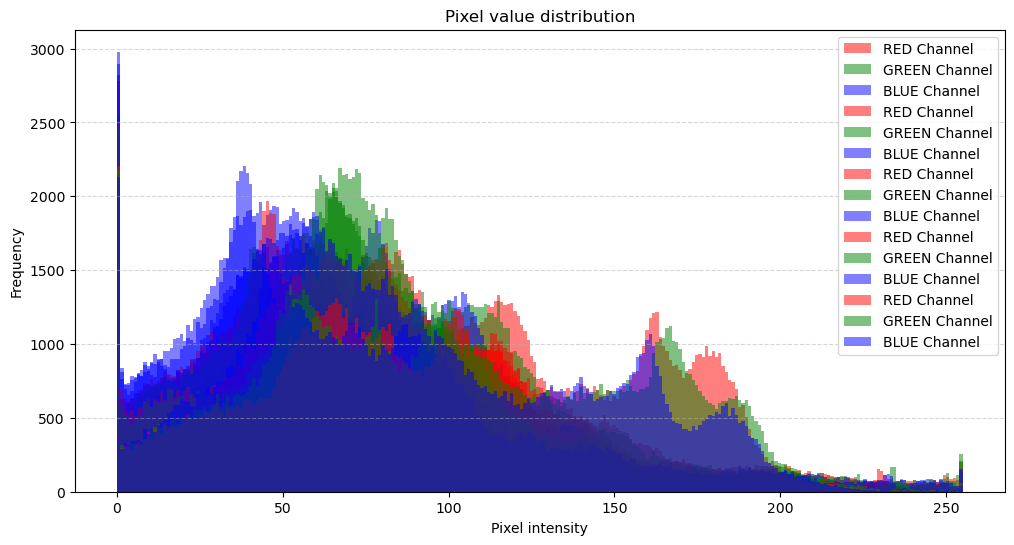

Class imbalance analysis:
Total pixels: 16000000
Road pixels (white): 3206368.0 (20.04%)
Non-road pixels (black): 12793632.0 (79.96%)


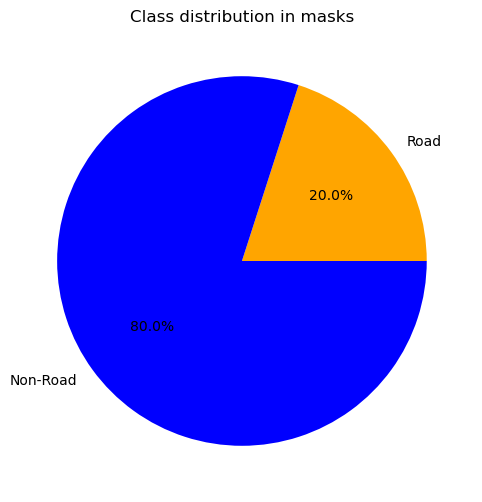

In [13]:
analyze_dataset(image_dir, process_masks_dir)

About 20% of the pixels in the images corresponds to a road. We will probably need to do class weighting.

In [14]:
def spatial_distribution_analysis(mask_dir, grid_size=(10, 10)):
    """
    Analyzes the spatial distribution of road pixels across binary masks.
    
    Parameters:
        mask_dir (str): Directory containing binary masks.
        grid_size (tuple): Size of grid for aggregation (rows, columns).
    """
    mask_files = os.listdir(mask_dir)
    
    grid_road_density = np.zeros(grid_size, dtype=np.float32)
    
    for mask_name in mask_files:
        mask = np.array(Image.open(os.path.join(mask_dir, mask_name)))/255
        
        assert set(np.unique(mask)).issubset({0, 1}), f"Mask {mask_name} is not binary!"
        
        # Divide mask into grid regions and calculate road density
        h, w = mask.shape
        grid_h, grid_w = grid_size
        cell_h, cell_w = h // grid_h, w // grid_w
        
        for i in range(grid_h):
            for j in range(grid_w):
                cell = mask[i * cell_h:(i + 1) * cell_h, j * cell_w:(j + 1) * cell_w]
                grid_road_density[i, j] += np.sum(cell)
    
    # Normalize road density by the total number of pixels per cell
    total_pixels_per_cell = (mask.shape[0] // grid_size[0]) * (mask.shape[1] // grid_size[1])
    grid_road_density /= (len(mask_files) * total_pixels_per_cell)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(grid_road_density, cmap="hot", interpolation="nearest")
    plt.colorbar(label="Average road density")
    plt.title("Spatial distribution of road pixels")
    plt.xlabel("Grid column")
    plt.ylabel("Grid row")
    plt.show()

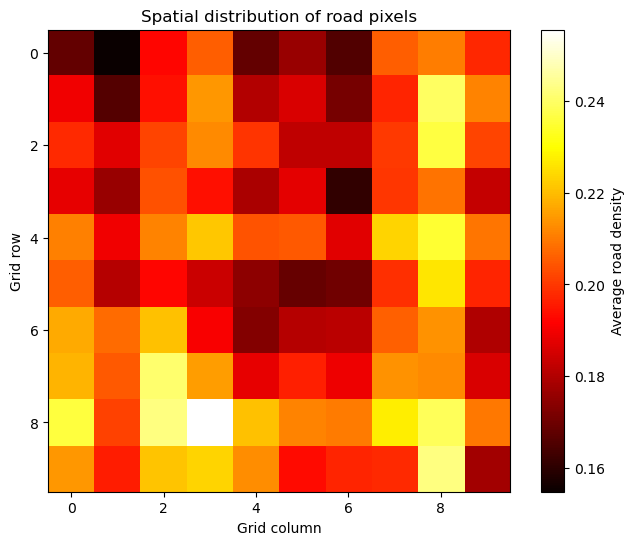

In [15]:
spatial_distribution_analysis(process_masks_dir, grid_size=(10, 10))

The pixels corresponding to a road seem to be less likely to be located in the top left corner of the satellite image. To avoid any biases, we should do data augmentation through rotations and flips.

## Data augmentation

In [16]:
import albumentations as A
from albumentations.augmentations.transforms import Normalize
from albumentations.core.composition import OneOf
from albumentations.augmentations import functional as F
from albumentations.pytorch import ToTensorV2

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [17]:
AUGMENTED_IMAGE_DIR = "data/training/augmented/images"
AUGMENTED_MASK_DIR = "data/training/augmented/masks"

os.makedirs(AUGMENTED_IMAGE_DIR, exist_ok=True)
os.makedirs(AUGMENTED_MASK_DIR, exist_ok=True)


augmentation_pipeline = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.5),
        OneOf(
            [
                A.GaussNoise(var_limit=(10, 50), p=0.5),
            ],
            p=0.7,
        ),
    ]
)

In [18]:
def augment_and_save(image_dir, mask_dir, augmented_image_dir, augmented_mask_dir, num_augmentations=3):
    '''
    Augments the data and saves it
    '''
    image_files = os.listdir(image_dir)
    
    for image_name in image_files:
        image_path = os.path.join(image_dir, image_name)
        mask_path = os.path.join(mask_dir, image_name) 
        
        image = np.array(Image.open(image_path).convert("RGB"))
        mask = np.array(Image.open(mask_path))
        
        assert set(np.unique(mask)).issubset({0, 255}), f"Mask {image_name} is not binary!"
        
        for i in range(num_augmentations):

            augmented = augmentation_pipeline(image=image, mask=mask)
            augmented_image = augmented['image']
            augmented_mask = augmented['mask']
            
            aug_image_path = os.path.join(augmented_image_dir, f"{os.path.splitext(image_name)[0]}_aug_{i}.png")
            aug_mask_path = os.path.join(augmented_mask_dir, f"{os.path.splitext(image_name)[0]}_aug_{i}.png")
            
            Image.fromarray(augmented_image).save(aug_image_path)
            Image.fromarray(augmented_mask).save(aug_mask_path)
            
        print(f"Augmented {image_name} and saved {num_augmentations} variations.")

In [19]:
augment_and_save(image_dir, process_masks_dir, AUGMENTED_IMAGE_DIR, AUGMENTED_MASK_DIR, num_augmentations=5)

Augmented satImage_052.png and saved 5 variations.
Augmented satImage_046.png and saved 5 variations.
Augmented satImage_091.png and saved 5 variations.
Augmented satImage_085.png and saved 5 variations.
Augmented satImage_084.png and saved 5 variations.
Augmented satImage_090.png and saved 5 variations.
Augmented satImage_047.png and saved 5 variations.
Augmented satImage_053.png and saved 5 variations.
Augmented satImage_045.png and saved 5 variations.
Augmented satImage_051.png and saved 5 variations.
Augmented satImage_079.png and saved 5 variations.
Augmented satImage_086.png and saved 5 variations.
Augmented satImage_092.png and saved 5 variations.
Augmented satImage_093.png and saved 5 variations.
Augmented satImage_087.png and saved 5 variations.
Augmented satImage_078.png and saved 5 variations.
Augmented satImage_050.png and saved 5 variations.
Augmented satImage_044.png and saved 5 variations.
Augmented satImage_068.png and saved 5 variations.
Augmented satImage_040.png and 

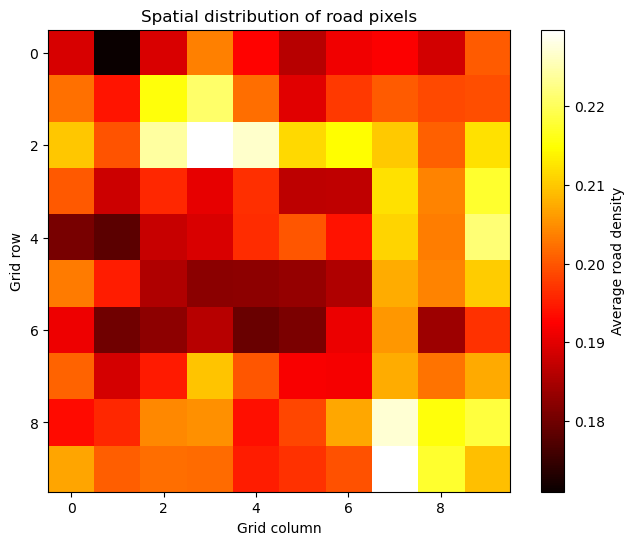

In [20]:
spatial_distribution_analysis(AUGMENTED_MASK_DIR, grid_size=(10, 10))

Add other data augmentations such as blur and noise etc. 

Ethical risk, use digital risk canvas about the project; procedure available online see project descriptions (200-400 words to add to the report).

### External Dataset

In [35]:
from pathlib import Path
path_zurich = "data/training/zurich"
zurich = []
for file in Path(path_zurich).iterdir():
    if file.suffix == ".png":
        zurich.append(file)

path_paris = "data/training/paris"
paris = []
for file in Path(path_paris).iterdir():
    if file.suffix == ".png":
        paris.append(file)

path_chicago = "data/training/chicago"
chicago = []
for file in Path(path_chicago).iterdir():
    if file.suffix == ".png":
        chicago.append(file)

path_berlin = "data/training/berlin"
berlin = []
for file in Path(path_berlin).iterdir():
    if file.suffix == ".png":
        berlin.append(file)
print(f"Number of images of Zurich {len(zurich)}, Paris {len(paris)}, Chicago {len(chicago)}, and Berlin {len(berlin)}")

Number of images of Zurich 728, Paris 1250, Chicago 914, and Berlin 400


In [ ]:
# Shape of the images
train_image_ext = np.array(Image.open(train_path_ext))
size_train_ext = train_image_ext.shape
print(f"The size of images is {size_train_ext}")
print(np.max(train_image_ext[1]))

The size of images is (2816, 3072, 3)
255


In [38]:
image = np.array(Image.open("data/training/chicago/chicago1_image.png"))
mask = np.array(Image.open("data/training/chicago/chicago1_labels.png"))

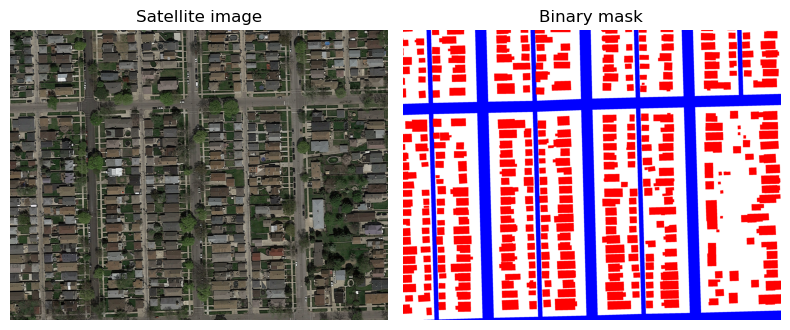

In [39]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Satellite image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Binary mask")
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
original_image = np.array(Image.open("data/training/images/satImage_001.png"))
augmented_image = np.array(Image.open("data/training/augmented/images/satImage_001_aug_0.png"))

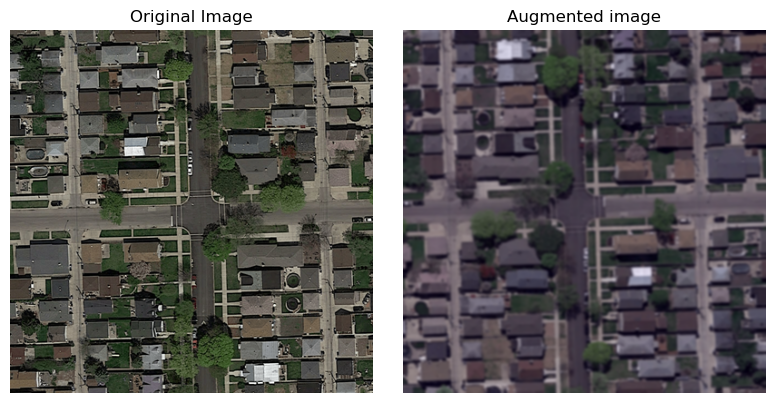

In [8]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented image")
plt.axis('off')

plt.tight_layout()
plt.show()